<a href="https://colab.research.google.com/github/VyshnaviBasude/Team-TrailBlazers/blob/main/Bivaraint_Categorical%26Categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/rideshare_kaggle.csv.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall( path="/content/")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df= pd.read_csv("/content/rideshare_kaggle.csv")
df.head(4)



,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800


In [6]:

from scipy.stats import chi2_contingency

# Assuming `df` is our DataFrame
subset_df = df[['cab_type', 'source']]

# Create a contingency table
contingency_table = pd.crosstab(subset_df['cab_type'], subset_df['source'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi-Square Statistic: 2.2519199181139564
P-value: 0.9973970136861263
Degrees of Freedom: 11
Expected Frequencies: 
[[25633.33790622 25460.79900039 25620.91865336 25617.81384014
  26105.7130597  25608.49940049 25620.47510861 25334.38874805
  25617.3702954  25614.70902693 25642.65234586 25531.32261485]
 [32158.66209378 31942.20099961 32143.08134664 32139.18615986
  32751.2869403  32127.50059951 32142.52489139 31783.61125195
  32138.6297046  32135.29097307 32170.34765414 32030.67738515]]


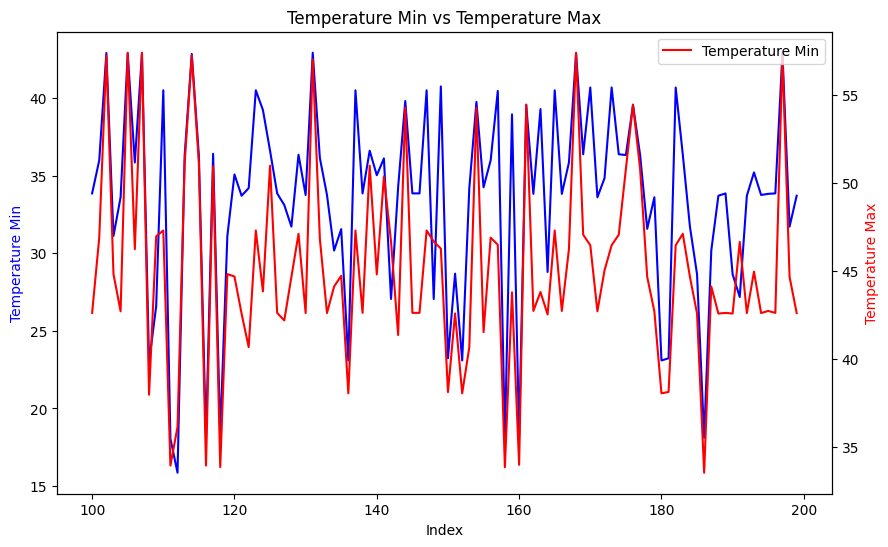

In [14]:
#  Bivariant - Categorical & Categorical - 2-Y Axis Plot

# Assuming `df` is our DataFrame
plt.figure(figsize=(10, 6))

# Generate example data (replace this with actual data)
start_index = 100  # Starting index
end_index = 200    # Ending index

# Extract a subset of the data
temperature_min = df['temperatureMin'][start_index:end_index]
temperature_max = df['temperatureMax'][start_index:end_index]

# Create the first y-axis (left)
plt.plot(temperature_min, color='blue')
plt.xlabel('Index')
plt.ylabel('Temperature Min', color='blue')

# Create the second y-axis (right)
plt.twinx()
plt.plot(temperature_max, color='red')
plt.ylabel('Temperature Max', color='red')

# Add title and legend
plt.title('Temperature Min vs Temperature Max')
plt.legend(['Temperature Min', 'Temperature Max'], loc='upper right')

# Show the plot
plt.show()

